# 数值验证格式的精度

### 一阶导数

In [124]:
import numpy as np
#Example function u=sinx, u'=cosx, u''=-sinx,step=dx
def function(n_step,x,step):
    return np.sin(x+step*n_step)
def First_Derivative_Forward(x,step):
    return (function(1,x,step)-function(0,x,step))/step

def First_Derivative_Central(x,step):
    return (function(1,x,step)-function(-1,x,step))/(2*step)

In [58]:
Steps=np.logspace(-3, -1, 15)
X_set=[np.pi/4,np.pi*0.75]
Error_f={x: [] for x in X_set}
Error_c={x: [] for x in X_set}
for step in Steps:
    for x in X_set:
        fdf=First_Derivative_Forward(x,step)
        fdc=First_Derivative_Central(x,step)
        fd=np.cos(x)
        error_f=np.abs(fdf-fd)
        error_c=np.abs(fdc-fd)
        Error_f[x].append(error_f)
        Error_c[x].append(error_c)
        print(f"步长:{step}, 一阶导数向前差分误差:{error_f:.4f},一阶导数中心差分误差:{error_c}")

步长:0.001, 一阶导数向前差分误差:0.0004,一阶导数中心差分误差:1.1785109255146864e-07
步长:0.001, 一阶导数向前差分误差:0.0004,一阶导数中心差分误差:1.178512034627488e-07
步长:0.0013894954943731374, 一阶导数向前差分误差:0.0005,一阶导数中心差分误差:2.2753487471938172e-07
步长:0.0013894954943731374, 一阶导数向前差分误差:0.0005,一阶导数中心差分误差:2.2753487460835942e-07
步长:0.0019306977288832496, 一阶导数向前差分误差:0.0007,一阶导数中心差分误差:4.393010566428046e-07
步长:0.0019306977288832496, 一阶导数向前差分误差:0.0007,一阶导数中心差分误差:4.3930102777700597e-07
步长:0.0026826957952797246, 一阶导数向前差分误差:0.0009,一阶导数中心差分误差:8.481574107488399e-07
步长:0.0026826957952797246, 一阶导数向前差分误差:0.0009,一阶导数中心差分误差:8.481574106378176e-07
步长:0.003727593720314938, 一阶导数向前差分误差:0.0013,一阶导数中心差分误差:1.637535001708379e-06
步长:0.003727593720314938, 一阶导数向前差分误差:0.0013,一阶导数中心差分误差:1.6375350463393445e-06
步长:0.005179474679231213, 一阶导数向前差分误差:0.0018,一阶导数中心差分误差:3.1615830826670077e-06
步长:0.005179474679231213, 一阶导数向前差分误差:0.0018,一阶导数中心差分误差:3.1615830933251488e-06
步长:0.0071968567300115215, 一阶导数向前差分误差:0.0026,一阶导数中心差分误差:6.104053652533636e-06
步长:0.0071968567300115215, 一阶

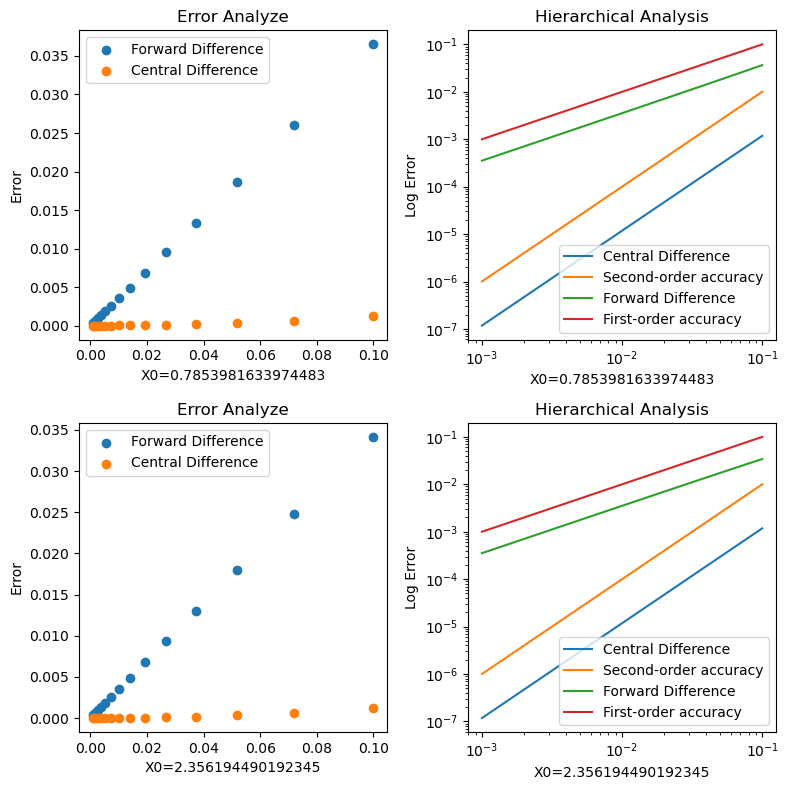

In [59]:
import matplotlib.pyplot as plt
column,row=2,len(X_set)
fig,axes = plt.subplots(row,column,figsize=(4*column, 4*row))
axes=axes.flatten()
for idx,x in enumerate(X_set):
    ax=axes[idx*2]
    ax.set_xlabel(f"X0={x}")
    ax.set_ylabel("Error")
    ax.set_title("Error Analyze")
    ax.scatter(Steps,Error_f[x],label='Forward Difference')
    ax.scatter(Steps,Error_c[x],label='Central Difference')
    ax.legend()
    ax=axes[idx*2+1]
    ax.set_xlabel(f"X0={x}")
    ax.set_ylabel("Log Error")
    ax.set_title("Hierarchical Analysis")
    ax.loglog(Steps,Error_c[x],label='Central Difference')
    ax.loglog(Steps,Steps**2,label='Second-order accuracy')
    ax.loglog(Steps,Error_f[x],label='Forward Difference')
    ax.loglog(Steps,Steps,label='First-order accuracy')
    ax.legend()
plt.tight_layout()
plt.savefig("Results.png")
plt.show()

### 二阶导数

In [110]:
def Second_Derivative_Central(x,step):
    return (function(1,x,step)-2*function(0,x,step)+function(-1,x,step))/(step**2)

def Second_Derivative_Fourth_Central(x,step):
    return (-1)*((function(2,x,step)-16*function(1,x,step)+30*function(0,x,step)-16*function(-1,x,step)+function(-2,x,step))/(12*(step**2)))

In [111]:
Steps=np.logspace(-2, -1, 15)
X_set=[np.pi/4,np.pi*0.75]
Error_f2={x: [] for x in X_set}
Error_c2={x: [] for x in X_set}
for step in Steps:
    for x in X_set:
        fdf=Second_Derivative_Central(x,step)
        fdc=Second_Derivative_Fourth_Central(x,step)
        fd=-np.sin(x)
        error_f2=np.abs(fdf-fd)
        error_c2=np.abs(fdc-fd)
        Error_f2[x].append(error_f2)
        Error_c2[x].append(error_c2)
        print(f"步长:{step}, 二阶导数二阶中心差分误差:{error_f2},二阶导数四阶中心差分误差:{error_c2}")

步长:0.01, 二阶导数二阶中心差分误差:5.892538209817388e-06,二阶导数四阶中心差分误差:8.17796941277038e-11
步长:0.01, 二阶导数二阶中心差分误差:5.892538209928411e-06,二阶导数四阶中心差分误差:8.122469363769369e-11
步长:0.011787686347935873, 二阶导数二阶中心差分误差:8.187643241508447e-06,二阶导数四阶中心差分误差:1.5268497577380913e-10
步长:0.011787686347935873, 二阶导数二阶中心差分误差:8.187643241619469e-06,二阶导数四阶中心差分误差:1.527517001775891e-10
步长:0.013894954943731374, 二阶导数二阶中心差分误差:1.137667265660447e-05,二阶导数四阶中心差分误差:2.9363722564568207e-10
步长:0.013894954943731374, 二阶导数二阶中心差分误差:1.1376672656715492e-05,二阶导数四阶中心差分误差:2.933497889046066e-10
步长:0.016378937069540637, 二阶导数二阶中心差分误差:1.5807795626598953e-05,二阶导数四阶中心差分误差:5.662110780235707e-10
步长:0.016378937069540637, 二阶导数二阶中心差分误差:1.5807795626709975e-05,二阶导数四阶中心差分误差:5.663146618317683e-10
步长:0.019306977288832496, 二阶导数二阶中心差分误差:2.1964783868511084e-05,二阶导数四阶中心差分误差:1.0920294668537167e-09
步长:0.019306977288832496, 二阶导数二阶中心差分误差:2.1964783868622106e-05,二阶导数四阶中心差分误差:1.09207920484522e-09
步长:0.022758459260747887, 二阶导数二阶中心差分误差:3.051982052171276e-05,二阶导数四阶中心差分误差:2.1

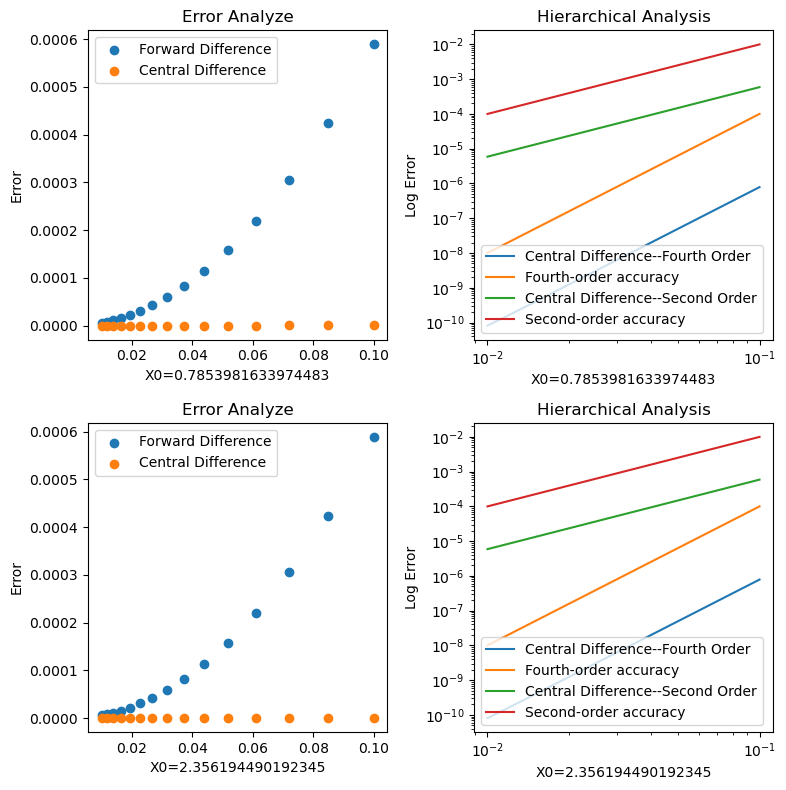

In [112]:
import matplotlib.pyplot as plt
column,row=2,len(X_set)
fig,axes = plt.subplots(row,column,figsize=(4*column, 4*row))
axes=axes.flatten()
for idx,x in enumerate(X_set):
    ax=axes[idx*2]
    ax.set_xlabel(f"X0={x}")
    ax.set_ylabel("Error")
    ax.set_title("Error Analyze")
    ax.scatter(Steps,Error_f2[x],label='Forward Difference')
    ax.scatter(Steps,Error_c2[x],label='Central Difference')
    ax.legend()
    ax=axes[idx*2+1]
    ax.set_xlabel(f"X0={x}")
    ax.set_ylabel("Log Error")
    ax.set_title("Hierarchical Analysis")
    ax.loglog(Steps,Error_c2[x],label='Central Difference--Fourth Order')
    ax.loglog(Steps,Steps**4,label='Fourth-order accuracy')
    ax.loglog(Steps,Error_f2[x],label='Central Difference--Second Order')
    ax.loglog(Steps,Steps**2,label='Second-order accuracy')
    ax.legend()
plt.tight_layout()
plt.savefig("Results2.png")
plt.show()

# 舍入误差和截断误差的规律

### 一阶导数

In [193]:
def PolyF(n,x,step):
    return x+n*step
def d1(x):
    return 1
#另一函数仍然使用y=sinx

In [194]:
def First_Derivative_Forward_Poly(x,step):
    return (PolyF(1,x,step)-PolyF(0,x,step))/step

def First_Derivative_Central_Poly(x,step):
    return (PolyF(1,x,step)-PolyF(-1,x,step))/(2*step)

In [195]:
Steps=np.logspace(-15, -1, 30)
X_set=[np.pi/4,np.pi*0.75]
Error_f={x: [] for x in X_set}
Error_c={x: [] for x in X_set}
Error_f_p={x: [] for x in X_set}
Error_c_p={x: [] for x in X_set}
for step in Steps:
    for x in X_set:
        fdf=First_Derivative_Forward(x,step)
        fdc=First_Derivative_Central(x,step)
        fdf_p=First_Derivative_Forward_Poly(x,step)
        fdc_p=First_Derivative_Central_Poly(x,step)
        fd=np.cos(x)
        fd_p=d1(x)
        error_f=np.abs(fdf-fd)
        error_c=np.abs(fdc-fd)
        error_f_p=np.abs(fdf_p-fd_p)
        error_c_p=np.abs(fdc_p-fd_p)
        Error_f[x].append(error_f)
        Error_c[x].append(error_c)
        Error_f_p[x].append(error_f_p)
        Error_c_p[x].append(error_c_p)
        #print(f"步长:{step}, 一阶导数向前差分误差:{error_f:.4f},一阶导数中心差分误差:{error_c},F_Poly:{error_f_p},Poly:{error_c_p},")

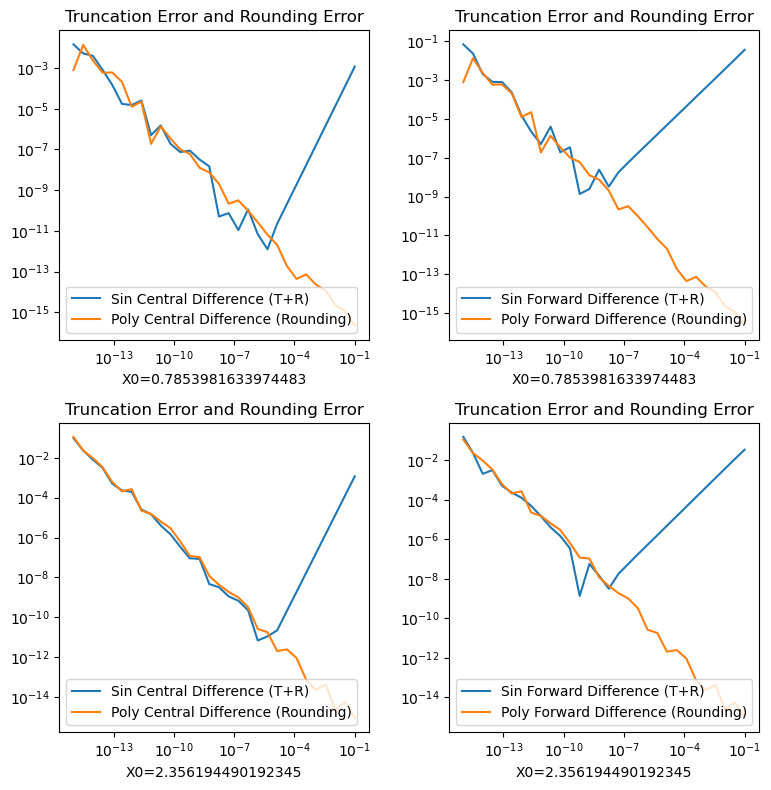

In [196]:
import matplotlib.pyplot as plt
column,row=2,len(X_set)
fig,axes = plt.subplots(row,column,figsize=(4*column, 4*row))
axes=axes.flatten()
for idx,x in enumerate(X_set):
    ax=axes[idx*2]
    ax.set_xlabel(f"X0={x}")
    #ax.set_ylabel("Log Error for Central Difference")
    ax.set_title("Truncation Error and Rounding Error")
    ax.loglog(Steps,Error_c[x],label='Sin Central Difference (T+R)')
    ax.loglog(Steps,Error_c_p[x],label='Poly Central Difference (Rounding)')
    ax.legend()
    ax=axes[idx*2+1]
    ax.set_xlabel(f"X0={x}")
    #ax.set_ylabel("Log Error for Central Difference")
    ax.set_title("Truncation Error and Rounding Error")
    ax.loglog(Steps,Error_f[x],label='Sin Forward Difference (T+R)')
    ax.loglog(Steps,Error_f_p[x],label='Poly Forward Difference (Rounding)')
    ax.legend()
plt.tight_layout()
plt.savefig("Results1_2.png")
plt.show()

### 二阶导数

In [197]:
def PolyF(n,x,step):
    return (x+n*step)**2
def d2(x):
    return 2
#另一函数仍然使用y=sinx

In [198]:
def Second_Derivative_Central_Poly(x,step):
    return (PolyF(1,x,step)-2*PolyF(0,x,step)+PolyF(-1,x,step))/(step**2)

def Second_Derivative_Fourth_Central_Poly(x,step):
    return (-1)*((PolyF(2,x,step)-16*PolyF(1,x,step)+30*PolyF(0,x,step)-16*PolyF(-1,x,step)+PolyF(-2,x,step))/(12*(step**2)))

In [199]:
Steps=np.logspace(-7, -1, 30)
X_set=[np.pi/4,np.pi*0.75]
Error_f={x: [] for x in X_set}
Error_c={x: [] for x in X_set}
Error_f_p={x: [] for x in X_set}
Error_c_p={x: [] for x in X_set}
for step in Steps:
    for x in X_set:
        fdf=Second_Derivative_Central(x,step)
        fdc=Second_Derivative_Fourth_Central(x,step)
        fdf_p=Second_Derivative_Central_Poly(x,step)
        fdc_p=Second_Derivative_Fourth_Central_Poly(x,step)
        fd=-np.sin(x)
        fd_p=d2(x)
        error_f=np.abs(fdf-fd)
        error_c=np.abs(fdc-fd)
        error_f_p=np.abs(fdf_p-fd_p)
        error_c_p=np.abs(fdc_p-fd_p)
        Error_f[x].append(error_f)
        Error_c[x].append(error_c)
        Error_f_p[x].append(error_f_p)
        Error_c_p[x].append(error_c_p)
        #print(f"步长:{step}, 一阶导数向前差分误差:{error_f:.4f},一阶导数中心差分误差:{error_c},F_Poly:{error_f_p},Poly:{error_c_p},")

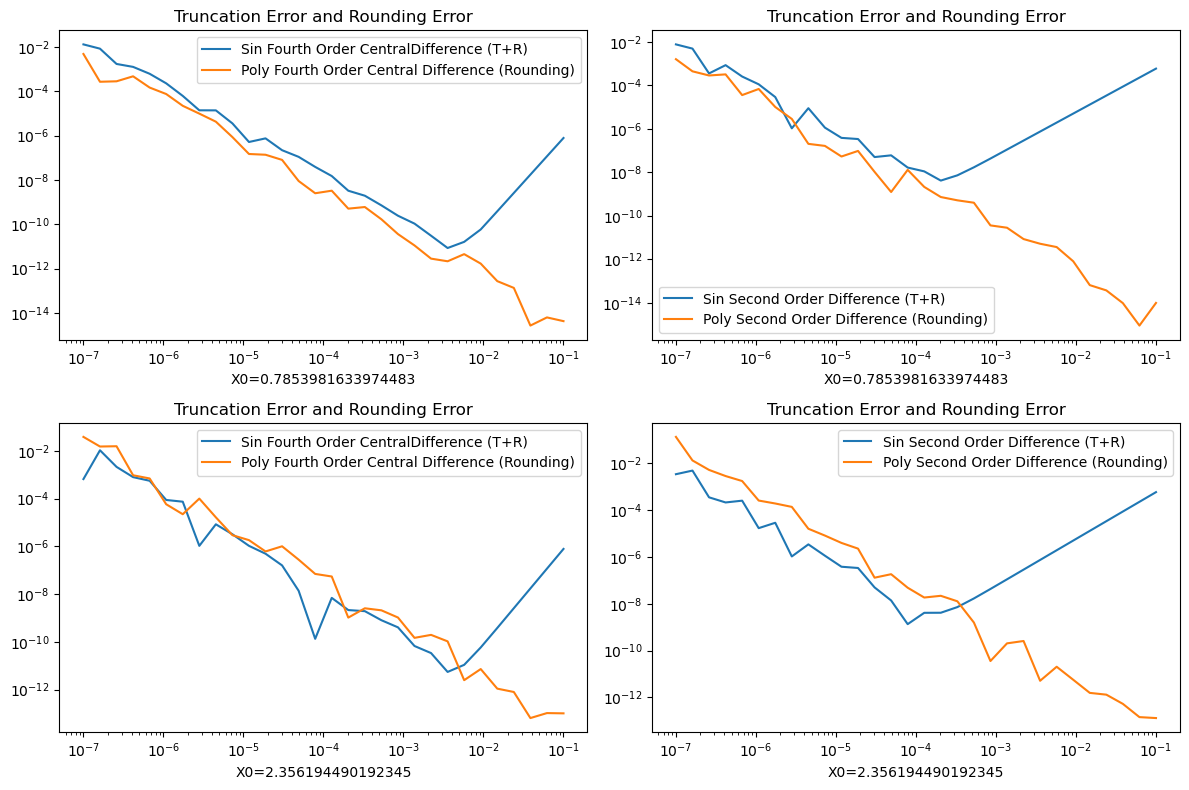

In [200]:
import matplotlib.pyplot as plt
column,row=2,len(X_set)
fig,axes = plt.subplots(row,column,figsize=(6*column, 4*row))
axes=axes.flatten()
for idx,x in enumerate(X_set):
    ax=axes[idx*2]
    ax.set_xlabel(f"X0={x}")
    #ax.set_ylabel("Log Error for Central Difference")
    ax.set_title("Truncation Error and Rounding Error")
    ax.loglog(Steps,Error_c[x],label='Sin Fourth Order CentralDifference (T+R)')
    ax.loglog(Steps,Error_c_p[x],label='Poly Fourth Order Central Difference (Rounding)')
    ax.legend()
    ax=axes[idx*2+1]
    ax.set_xlabel(f"X0={x}")
    #ax.set_ylabel("Log Error for Central Difference")
    ax.set_title("Truncation Error and Rounding Error")
    ax.loglog(Steps,Error_f[x],label='Sin Second Order Difference (T+R)')
    ax.loglog(Steps,Error_f_p[x],label='Poly Second Order Difference (Rounding)')
    ax.legend()
plt.tight_layout()
plt.savefig("Results2_2.png")
plt.show()

In [256]:
def function(n_step,x,step):
    return np.sin(x+step*n_step)
def First_Derivative_Forward(x,step,precision):
    x = x.astype(precision)
    return (function(1,x,step)-function(0,x,step))/step
def Second_Derivative_Central(x,step,precision):
    x = x.astype(precision)
    return (function(1,x,step)-2*function(0,x,step)+function(-1,x,step))/(step**2)

In [257]:
# 仍以y=sinx为例
X_set= np.linspace(0, 2 * np.pi, 100)
step=X_set[1]-X_set[0]
Error_f_1=[]
Error_f_2=[]
Error_c_1=[]
Error_c_2=[]

for x in X_set:
    fdf=First_Derivative_Forward(x,step,precision='float32')
    fdc=Second_Derivative_Central(x,step,precision='float32')
    fdf_p=First_Derivative_Forward(x,step,precision='float64')
    fdc_p=Second_Derivative_Central(x,step,precision='float64')
    fd=np.cos(x)
    fd_p=-np.sin(x)
    error_f=np.abs(fdf-fd)
    error_c=np.abs(fdc-fd_p)
    error_f_p=np.abs(fdf_p-fd)
    error_c_p=np.abs(fdc_p-fd_p)
    Error_f_1.append(error_f)
    Error_c_1.append(error_c)
    Error_f_2.append(error_f_p)
    Error_c_2.append(error_c_p)
    

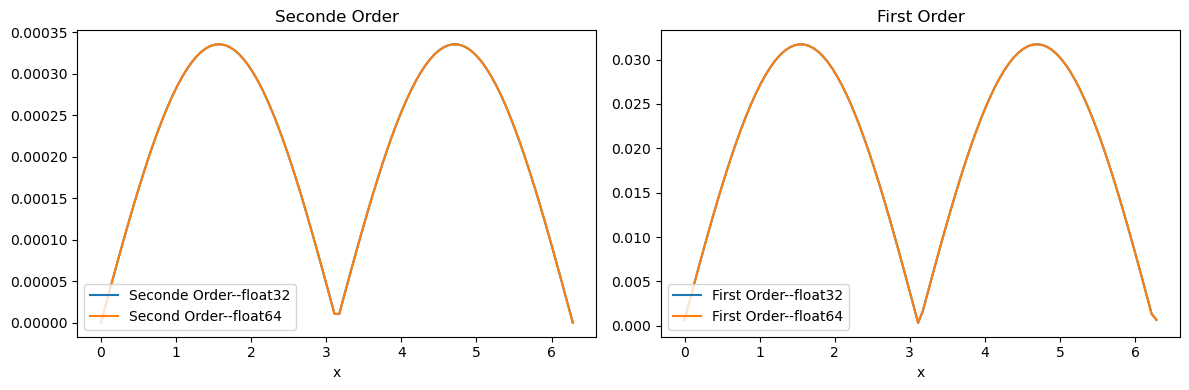

In [259]:
import matplotlib.pyplot as plt
column,row=2,1
fig,axes = plt.subplots(row,column,figsize=(6*column, 4*row))
axes=axes.flatten()
for idx in range(1):
    ax=axes[idx*2]
    ax.set_xlabel("x")
    ax.set_title("Seconde Order")
    ax.plot(X_set,Error_c_1,label='Seconde Order--float32')
    ax.plot(X_set,Error_c_2,label='Second Order--float64')
    ax.legend()
    ax=axes[idx*2+1]
    ax.set_xlabel("x")
    ax.set_title("First Order")
    ax.plot(X_set,Error_f_1,label='First Order--float32')
    ax.plot(X_set,Error_f_2,label='First Order--float64')
    ax.legend()
plt.tight_layout()
plt.savefig("Results3.png")
plt.show()